In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/hfm/lcheung/amrwind-frontend/'
import sys, os
sys.path.insert(1, amrwindfedir)
sys.path.insert(1, '../utilities')

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import SOWFAdata as sowfa
import postproamrwindsample as ppsample

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
rootdir    ='../'
comparedirs=[#{'dir':'AMRWind_unstable_test2',      'prefix':'AMRWind_winterunstable', 'ls':'-', 'label':'small unrotated'},
             {'dir':'AMRWind_stable_testrotated', 'prefix':'AMRWind_summerstable','ls':'-', 'c':'r', 'label':'AMR small 2x2km'},
             #{'dir':'AMRWind_unstable_bigdomain2', 'prefix':'AMRWind_winterunstable','ls':'--', 'c':'r','label':'AMR big 5x10km'},
             #{'dir':'AMRWind_unstable_bigdomain1', 'prefix':'AMRWind_winterunstable','ls':'-.', 'label':'rotated'},
            ]

profiledir='profiledata/'
comparetimes=[1, 5, 6, 7, 8]
comparetimes=[t*3600 for t in comparetimes]
print(comparetimes)

[3600, 18000, 21600, 25200, 28800]


## Load the SOWFA reference data

In [3]:
# WRF Forcing data
# SOWFA profile directories
SOWFAdir  = '../SOWFA-WRFforcing/summer-stable/drivingData/'
Tfile     = SOWFAdir+'/givenSourceT'
Ufile     = SOWFAdir+'/givenSourceU_component_rotated'
tfluxfile = SOWFAdir+'/surfaceTemperatureFluxTable'

# Load the SOWFA data
zT                   = sowfa.readsection(Tfile, 'sourceHeightsTemperature')
sowfatime, sowfatemp = sowfa.readsection(Tfile, 'sourceTableTemperature',
                                         splitfirstcol=True)

zMom                 = sowfa.readsection(Ufile, 'sourceHeightsMomentum')

t1, sowfa_momu       = sowfa.readsection(Ufile, 'sourceTableMomentumX',
                                         splitfirstcol=True)
t2, sowfa_momv       = sowfa.readsection(Ufile, 'sourceTableMomentumY',
                                         splitfirstcol=True)

t3, sowfa_tflux      = sowfa.readplainfile(tfluxfile, splitfirstcol=True)

t2, sowfa_WS         = sowfa.readsection(SOWFAdir+'/givenSourceU_speed_dir_rotated', 'sourceTableMomentumX',
                                         splitfirstcol=True)

print("Loaded SOWFA profiles")

Loaded SOWFA profiles


## Load the SOWFA results

In [4]:
SOWFAresultdir = '../SOWFA-results'
SOWFA_velocity = sowfa.readSOWFAresult(SOWFAresultdir+'/SOWFA_Vineyard-Summer-Stable_timeAveraged_velocity.dat')
SOWFA_Restress = sowfa.readSOWFAresult(SOWFAresultdir+'/SOWFA_Vineyard-Summer-Stable_timeAveraged_reynolds_stresses.dat')
SOWFA_Tflux    = sowfa.readSOWFAresult(SOWFAresultdir+'/SOWFA_Vineyard-Summer-Stable_timeAveraged_temperature_flux.dat')
SOWFA_temperature = sowfa.readSOWFAresult(SOWFAresultdir+'/SOWFA_Vineyard-Summer-Stable_timeAveraged_temperature.dat')

## Plot instantaneous horizontal velocity vs WRF

AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated


Text(0.5, 0.98, 'Horizontal velocity')

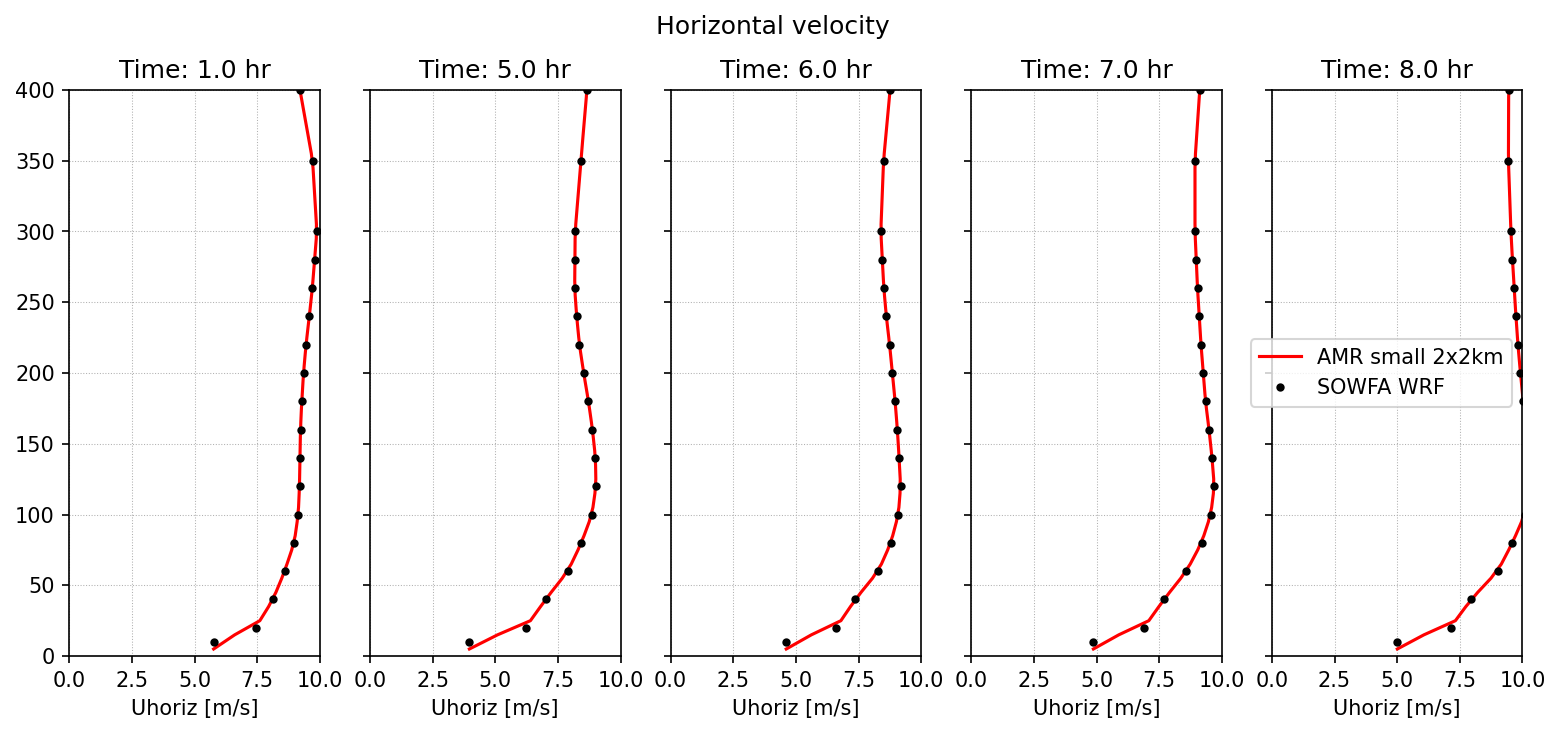

In [5]:
fig, axs = plt.subplots(1,len(comparetimes),figsize=(2.5*len(comparetimes),5), facecolor='w', dpi=150, sharey=True)

for it, time in enumerate(comparetimes):
    ax=axs[it]
    for case in comparedirs:
        loaddir = case['dir']
        prefix  = case['prefix']
        ls      = case['ls']
        print(loaddir)
        profiledat=np.loadtxt(rootdir+'/'+loaddir+'/'+profiledir+'/'+prefix+'_velocity_%06i.dat'%time)
        ax.plot(profiledat[:,4], profiledat[:,0], ls=ls, color=case['c'], label=case['label'])
    # Plot the SOWFA data
    stime = int(time/300)
    SOWFA_Uhoriz = np.sqrt(sowfa_momu[stime,:]**2 + sowfa_momv[stime,:]**2)
    ax.plot(SOWFA_Uhoriz, zMom, 'k.', label='SOWFA WRF')
    #ax.plot(sowfa_WS[stime,:], zMom, 'k.', label='SOWFA WRF')
    
    ax.set_title('Time: %0.1f hr'%(time/3600.0))
    ax.set_xlim([0,10])
    ax.set_ylim([0,400])
    ax.set_xlabel('Uhoriz [m/s]')
    ax.grid(ls=':', lw=0.5)
    
axs[-1].legend()
plt.suptitle('Horizontal velocity')

## Plot instantaneous temperature vs WRF

AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated


Text(0.5, 0.98, 'Temperature profiles')

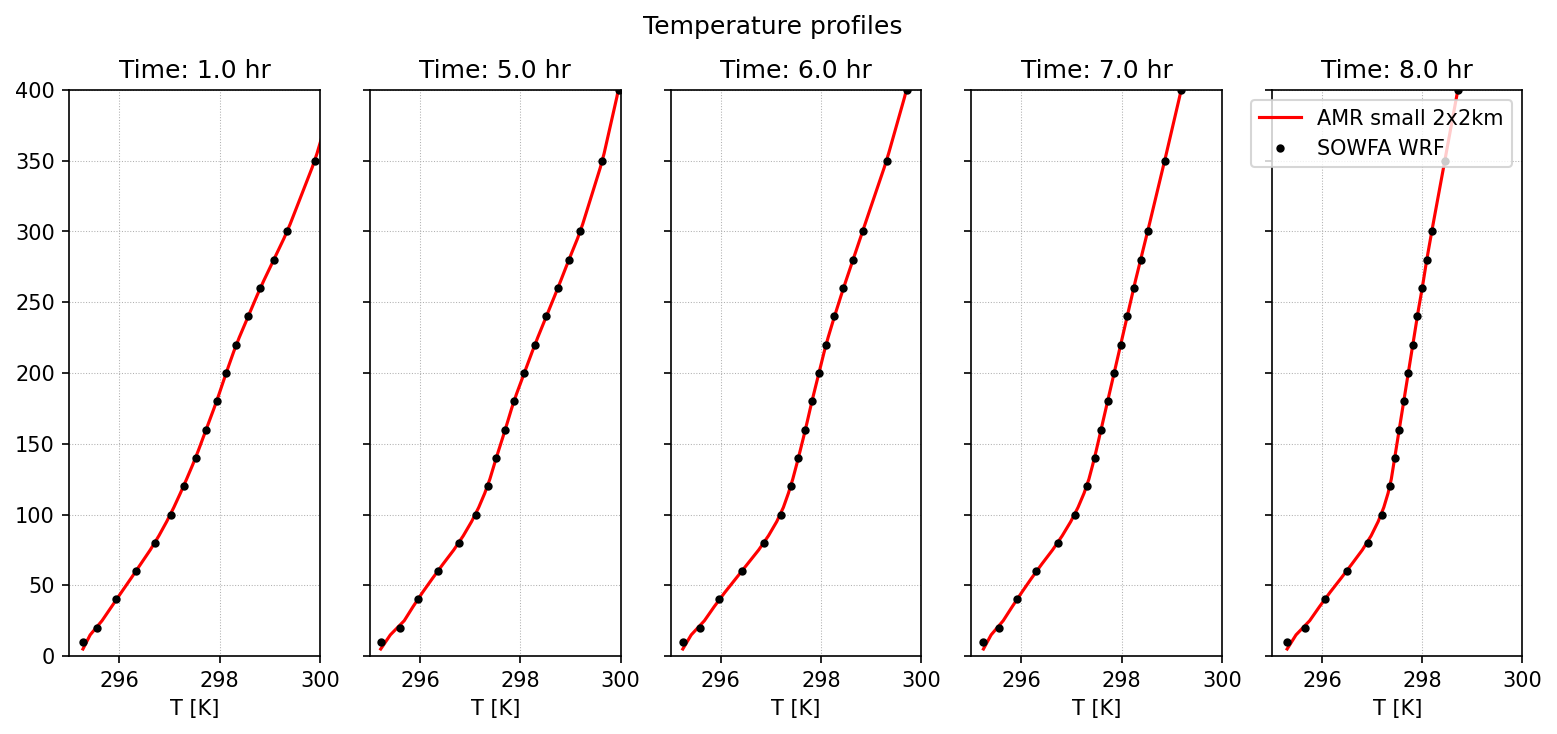

In [6]:
fig, axs = plt.subplots(1,len(comparetimes),figsize=(2.5*len(comparetimes),5), facecolor='w', dpi=150, sharey=True)

for it, time in enumerate(comparetimes):
    ax=axs[it]
    for case in comparedirs:
        loaddir = case['dir']
        prefix  = case['prefix']
        ls      = case['ls']
        print(loaddir)
        profiledat=np.loadtxt(rootdir+'/'+loaddir+'/'+profiledir+'/'+prefix+'_temperature_%06i.dat'%time)
        ax.plot(profiledat[:,1], profiledat[:,0], ls=ls, color=case['c'], label=case['label'])
        
    # Plot SOWFA
    stime = int(time/300)
    ax.plot(sowfatemp[stime,:], zMom, 'k.', label='SOWFA WRF')
    
    ax.set_title('Time: %0.1f hr'%(time/3600.0))
    ax.set_xlim([295, 300])
    ax.set_ylim([0, 400])
    ax.set_xlabel('T [K]')
    ax.grid(ls=':', lw=0.5)
    #ax.set_xlim([0,12.5])
axs[-1].legend()
plt.suptitle('Temperature profiles')

## Plot hourly averaged velocity

Text(0.5, 0.98, 'Velocity')

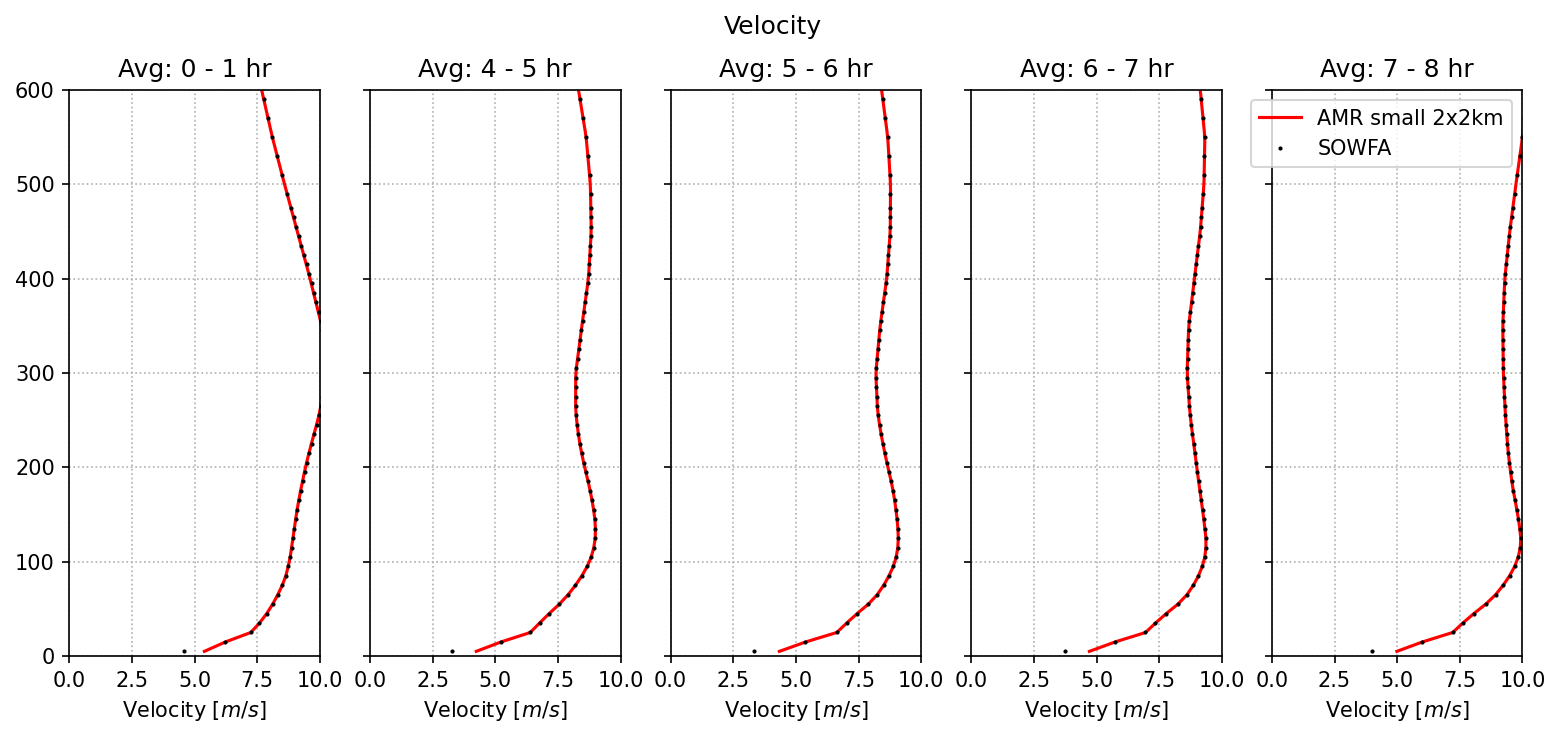

In [7]:
fig, axs = plt.subplots(1,len(comparetimes),figsize=(2.5*len(comparetimes),5), facecolor='w', dpi=150, sharey=True)

for it, time in enumerate(comparetimes):
    indx = int(time/3600)
    ax=axs[it]
    for case in comparedirs:
        loaddir = case['dir']
        prefix  = case['prefix']
        ls      = case['ls']
        try:
            profiledat=np.loadtxt(rootdir+'/'+loaddir+'/'+profiledir+'/'+prefix+'_velocity_avg_%i_to_%i.dat'%(indx-1, indx))
            umag = np.sqrt(profiledat[:,1]**2 + profiledat[:,2]**2)
            ax.plot(umag, profiledat[:,0], ls=ls, color=case['c'], label=case['label'])
        except:
            pass
    
    # Plot SOWFA result
    if (indx <= SOWFA_velocity.shape[0]):
        umag = np.sqrt(SOWFA_velocity[indx-1, :, 1]**2 + SOWFA_velocity[indx-1, :, 2]**2)
        ax.plot(umag, SOWFA_velocity[indx-1, :, 0], 'k.', label='SOWFA', markersize=2)
                              
    ax.set_title('Avg: %i - %i hr'%(indx-1, indx))
    ax.set_ylim([0,600])
    ax.set_xlim([0, 10])
    ax.grid(ls=':')
    ax.set_xlabel('Velocity [$m/s$]')

axs[-1].legend()
plt.suptitle('Velocity')

## Plot hourly averaged temperature

Text(0.5, 0.98, 'Temperature')

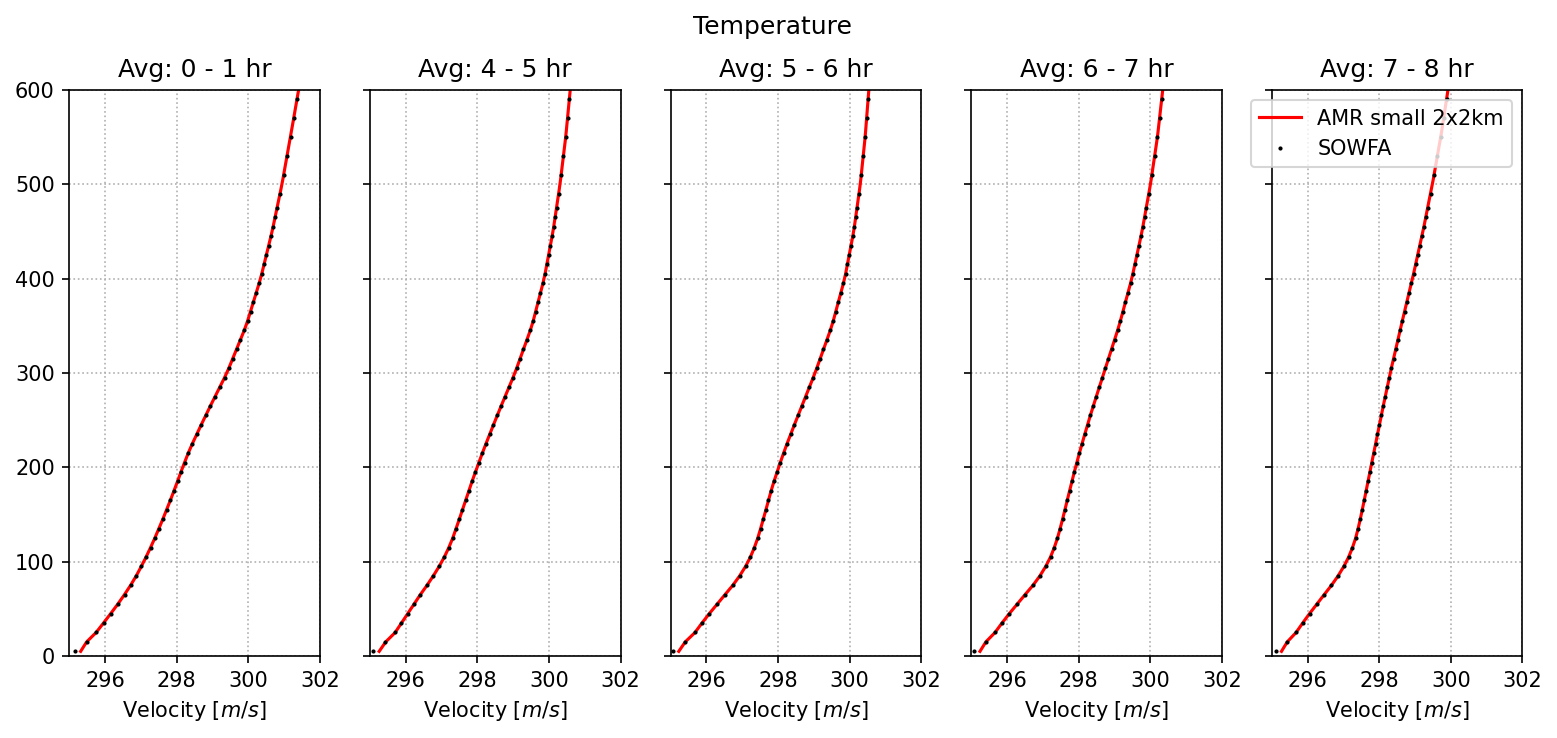

In [8]:
fig, axs = plt.subplots(1,len(comparetimes),figsize=(2.5*len(comparetimes),5), facecolor='w', dpi=150, sharey=True)

for it, time in enumerate(comparetimes):
    indx = int(time/3600)
    ax=axs[it]
    for case in comparedirs:
        loaddir = case['dir']
        prefix  = case['prefix']
        ls      = case['ls']
        try:
            profiledat=np.loadtxt(rootdir+'/'+loaddir+'/'+profiledir+'/'+prefix+'_temperature_avg_%i_to_%i.dat'%(indx-1, indx))
            ax.plot(profiledat[:,1], profiledat[:,0], ls=ls, color=case['c'], label=case['label'])
        except:
            pass
    
    # Plot SOWFA result
    if (indx <= SOWFA_temperature.shape[0]):
        ax.plot(SOWFA_temperature[indx-1, :, 1], SOWFA_temperature[indx-1, :, 0], 'k.', label='SOWFA', markersize=2)
                              
    ax.set_title('Avg: %i - %i hr'%(indx-1, indx))
    ax.set_ylim([0,600])
    ax.set_xlim([295, 302])
    ax.grid(ls=':')
    ax.set_xlabel('Velocity [$m/s$]')

axs[-1].legend()
plt.suptitle('Temperature')

## Plot Hourly Averaged TKE

Text(0.5, 0.98, 'Turbulent Kinetic Energy')

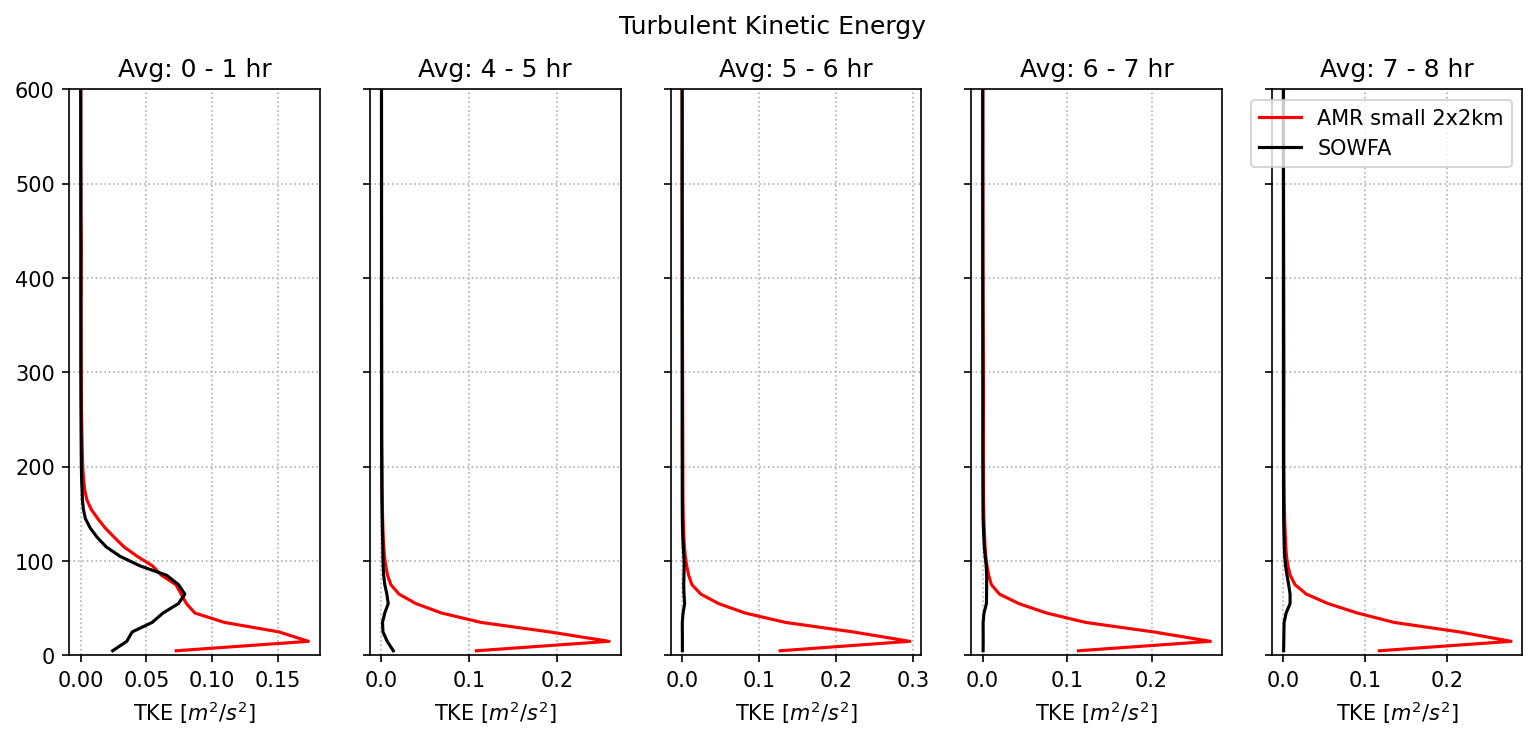

In [9]:
fig, axs = plt.subplots(1,len(comparetimes),figsize=(2.5*len(comparetimes),5), facecolor='w', dpi=150, sharey=True)

for it, time in enumerate(comparetimes):
    indx = int(time/3600)
    ax=axs[it]
    for case in comparedirs:
        loaddir = case['dir']
        prefix  = case['prefix']
        ls      = case['ls']
        try:
            profiledat=np.loadtxt(rootdir+'/'+loaddir+'/'+profiledir+'/'+prefix+'_reynoldsstresses_avg_%i_to_%i.dat'%(indx-1, indx))
            TKE = 0.5*(profiledat[:,1]+profiledat[:,4]+profiledat[:,6])
            TKE = profiledat[:,7]
            ax.plot(TKE, profiledat[:,0], ls=ls, color=case['c'], label=case['label'])
        except:
            pass
    
    # Plot SOWFA result
    if (indx <= SOWFA_Restress.shape[0]):
        ax.plot(SOWFA_Restress[indx-1, :, 7], SOWFA_Restress[indx-1, :, 0], 'k-', label='SOWFA')
                              
    ax.set_title('Avg: %i - %i hr'%(indx-1, indx))
    ax.set_ylim([0,600])
    #ax.set_xlim([0, 0.55])
    ax.grid(ls=':')
    ax.set_xlabel('TKE [$m^2/s^2$]')

axs[-1].legend()
plt.suptitle('Turbulent Kinetic Energy')

## Plot hourly averaged temperature flux

AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated
AMRWind_stable_testrotated


Text(0.5, 0.98, 'Vertical temperature flux')

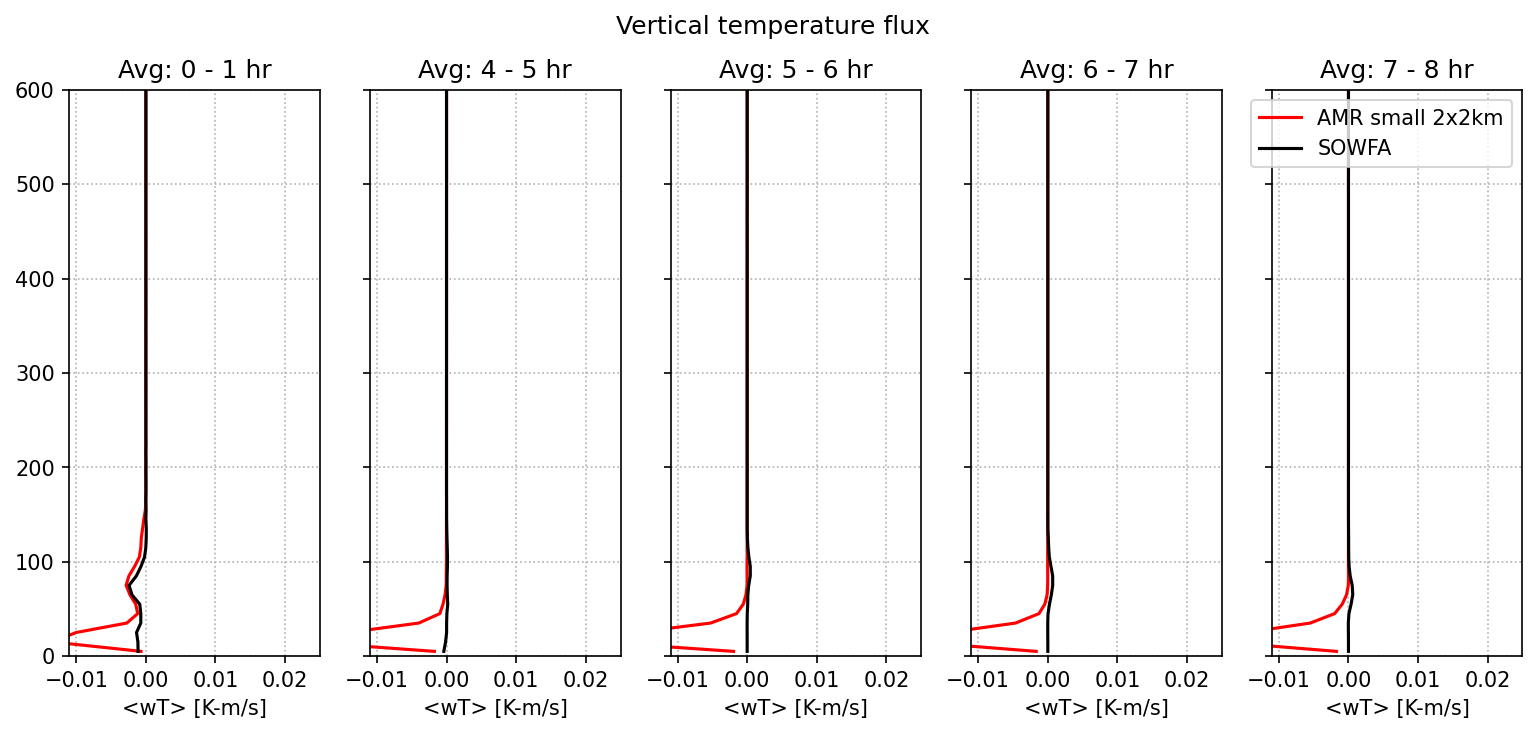

In [10]:
fig, axs = plt.subplots(1,len(comparetimes),figsize=(2.5*len(comparetimes),5), facecolor='w', dpi=150, sharey=True)

for it, time in enumerate(comparetimes):
    indx = int(time/3600)
    ax=axs[it]
    maxscale=0
    for case in comparedirs:
        loaddir = case['dir']
        prefix  = case['prefix']
        ls      = case['ls']
        print(loaddir)
        try:
            #profiledat=np.loadtxt(rootdir+'/'+loaddir+'/'+profiledir+'/'+prefix+'_temperaturefluxes_%06i.dat'%time)
            profiledat=np.loadtxt(rootdir+'/'+loaddir+'/'+profiledir+'/'+prefix+'_temperaturefluxes_avg_%i_to_%i.dat'%(indx-1, indx))
            ax.plot(profiledat[:,3], profiledat[:,0], ls=ls, color=case['c'], label=case['label'])
            if np.max(profiledat[:,3])>maxscale: maxscale=np.max(profiledat[:,3])
        except:
            pass
    # Plot SOWFA result
    if (indx <= SOWFA_Tflux.shape[0]):
        ax.plot(SOWFA_Tflux[indx-1, :, 3], SOWFA_Tflux[indx-1, :, 0], 'k-', label='SOWFA')
        
    ax.set_title('Avg: %i - %i hr'%(indx-1, indx))
    ax.set_ylim([0,600])
    if maxscale>0.02: 
        ax.set_xlim([-maxscale, maxscale])
    else:
        ax.set_xlim([-0.011, 0.011])
    ax.set_xlim([-0.011, 0.025])
    ax.grid(ls=':')
    ax.set_xlabel('<wT> [K-m/s]')
        
axs[-1].legend()
plt.suptitle('Vertical temperature flux')